<a href="https://colab.research.google.com/github/thuongh2/FinalProject/blob/main/NangSuatLua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Thu Đông

In [4]:
df_thu_dong = pd.read_excel("https://s3-hcm-r1.longvan.net/machine-learning/xnk_thu_dong.xlsx")
df_thu_dong.head()



,Loại,Tên,Năm,Diện tích (nghìn ha),Năng suất (tạ/ha),Sản lượng (nghìn tấn)
0,Tỉnh,An Giang,2023,227.547,73.0,1655.15
1,Tỉnh,An Giang,2022,229.800,73.4,1685.90
2,Tỉnh,An Giang,2021,230.400,76.9,1771.80
3,Tỉnh,An Giang,2020,229.400,71.7,1645.10
4,Tỉnh,An Giang,2019,233.700,71.0,1659.30


In [5]:
df_thu_dong = df_thu_dong.rename(columns={'Năm': 'date'})
def format_date(year):
    return f"01-01-{year}"
df_thu_dong["date"] = df_thu_dong["date"].apply(format_date)
df_thu_dong['date'] = pd.to_datetime(df_thu_dong['date'])

In [6]:
df_thu_dong.set_index('date', inplace=True)
df_thu_dong.head()

,Loại,Tên,Diện tích (nghìn ha),Năng suất (tạ/ha),Sản lượng (nghìn tấn)
date,,,,,
2023-01-01,Tỉnh,An Giang,227.547,73.0,1655.15
2022-01-01,Tỉnh,An Giang,229.800,73.4,1685.90
2021-01-01,Tỉnh,An Giang,230.400,76.9,1771.80
2020-01-01,Tỉnh,An Giang,229.400,71.7,1645.10
2019-01-01,Tỉnh,An Giang,233.700,71.0,1659.30


In [7]:
idx = pd.date_range(df_thu_dong.index.min(), df_thu_dong.index.max())
df_thu_dong = df_thu_dong.reindex(idx)

In [8]:
df_thu_dong.fillna(method='ffill', inplace=True)

In [9]:
df_thu_dong.head()

,Loại,Tên,Diện tích (nghìn ha),Năng suất (tạ/ha),Sản lượng (nghìn tấn)
2010-01-01,Tỉnh,An Giang,234.2,73.0,1708.9
2010-01-02,Tỉnh,An Giang,234.2,73.0,1708.9
2010-01-03,Tỉnh,An Giang,234.2,73.0,1708.9
2010-01-04,Tỉnh,An Giang,234.2,73.0,1708.9
2010-01-05,Tỉnh,An Giang,234.2,73.0,1708.9


#### Hè Thu

In [10]:
df_he_thu = pd.read_excel("https://res.cloudinary.com/djqfsurdo/raw/upload/v1711100371/ymwvjf8i0q2iexo9tzza.xlsx")
df_he_thu.head()

,Loại,Tên,Năm,Diện tích (nghìn ha),Năng suất (tạ/ha),Sản lượng (nghìn tấn)
0,Tỉnh,An Giang,2023,227.547,73.0,1655.15
1,Tỉnh,An Giang,2022,229.800,73.4,1685.90
2,Tỉnh,An Giang,2021,230.400,76.9,1771.80
3,Tỉnh,An Giang,2020,229.400,71.7,1645.10
4,Tỉnh,An Giang,2019,233.700,71.0,1659.30


In [11]:
df_he_thu = df_he_thu.rename(columns={'Năm': 'date'})
def format_date(year):
    return f"01-01-{year}"
df_he_thu["date"] = df_he_thu["date"].apply(format_date)
df_he_thu['date'] = pd.to_datetime(df_he_thu['date'])

In [12]:
df_he_thu.set_index('date', inplace=True)
df_he_thu.head()

,Loại,Tên,Diện tích (nghìn ha),Năng suất (tạ/ha),Sản lượng (nghìn tấn)
date,,,,,
2023-01-01,Tỉnh,An Giang,227.547,73.0,1655.15
2022-01-01,Tỉnh,An Giang,229.800,73.4,1685.90
2021-01-01,Tỉnh,An Giang,230.400,76.9,1771.80
2020-01-01,Tỉnh,An Giang,229.400,71.7,1645.10
2019-01-01,Tỉnh,An Giang,233.700,71.0,1659.30


In [13]:
idx = pd.date_range(df_he_thu.index.min(), df_he_thu.index.max())
df_he_thu = df_he_thu.reindex(idx)

In [14]:
df_he_thu.fillna(method='ffill', inplace=True)
df_he_thu.head()

,Loại,Tên,Diện tích (nghìn ha),Năng suất (tạ/ha),Sản lượng (nghìn tấn)
2010-01-01,Tỉnh,An Giang,234.2,73.0,1708.9
2010-01-02,Tỉnh,An Giang,234.2,73.0,1708.9
2010-01-03,Tỉnh,An Giang,234.2,73.0,1708.9
2010-01-04,Tỉnh,An Giang,234.2,73.0,1708.9
2010-01-05,Tỉnh,An Giang,234.2,73.0,1708.9


In [15]:
# # Tách dữ liệu từ tháng 1 đến tháng 6 của df_he_thu
# df_he_thu_first_half = df_he_thu[df_he_thu.index.month <= 6]

# # Tách dữ liệu từ tháng 7 đến tháng 12 của df_thu_dong
# df_thu_dong_second_half = df_thu_dong[df_thu_dong.index.month >= 7]

# # Kết hợp dữ liệu từ hai nửa của năm
# df_rice = pd.concat([df_he_thu_first_half, df_thu_dong_second_half])

# # In ra một số dòng đầu của df_rice
# print(df_rice.head())

In [16]:
# Tách dữ liệu từ tháng 4 đến tháng 8 của df_thu_dong
df_thu_dong_second_half = df_thu_dong[(df_thu_dong.index.month >= 4) & (df_thu_dong.index.month <= 8)]

# Tách dữ liệu từ tháng 9 của năm trước đến tháng 5 của năm sau của df_he_thu
df_he_thu_second_half = df_he_thu[(df_he_thu.index.month >= 9) | (df_he_thu.index.month <= 3)]

# Kết hợp dữ liệu từ hai nửa của năm
df_rice = pd.concat([df_he_thu_second_half, df_thu_dong_second_half])

# In ra một số dòng đầu của df_rice
print(df_rice.head())

            Loại       Tên  Diện tích (nghìn ha)  Năng suất (tạ/ha)  \
2010-01-01  Tỉnh  An Giang                 234.2               73.0   
2010-01-02  Tỉnh  An Giang                 234.2               73.0   
2010-01-03  Tỉnh  An Giang                 234.2               73.0   
2010-01-04  Tỉnh  An Giang                 234.2               73.0   
2010-01-05  Tỉnh  An Giang                 234.2               73.0   

            Sản lượng (nghìn tấn)  
2010-01-01                 1708.9  
2010-01-02                 1708.9  
2010-01-03                 1708.9  
2010-01-04                 1708.9  
2010-01-05                 1708.9  


In [17]:
# Truy cập dữ liệu của df_rice vào ngày 1-1-2010
rice_data = df_rice.loc['2011-04-01']

# Truy cập dữ liệu của df_thu_dong vào ngày 1-1-2010
thu_dong_data = df_he_thu.loc['2011-04-01']

# So sánh dữ liệu
if rice_data.equals(thu_dong_data):
    print("Giống")
else:
    print("Khác")

Giống


In [18]:
df_rice['date'] = df_rice.index

In [19]:
df_rice.head()

,Loại,Tên,Diện tích (nghìn ha),Năng suất (tạ/ha),Sản lượng (nghìn tấn),date
2010-01-01,Tỉnh,An Giang,234.2,73.0,1708.9,2010-01-01
2010-01-02,Tỉnh,An Giang,234.2,73.0,1708.9,2010-01-02
2010-01-03,Tỉnh,An Giang,234.2,73.0,1708.9,2010-01-03
2010-01-04,Tỉnh,An Giang,234.2,73.0,1708.9,2010-01-04
2010-01-05,Tỉnh,An Giang,234.2,73.0,1708.9,2010-01-05


In [20]:
df_rice = df_rice.rename(columns = {"Diện tích (nghìn ha)": "area", "Năng suất (tạ/ha)": "productivity", "Sản lượng (nghìn tấn)": "quantity"})

In [21]:
df = pd.read_csv("https://s3-hcm-r1.longvan.net/machine-learning/data%20%282%29.csv")

In [22]:
df.head()

,Unnamed: 0,date,price,tavg,tmin,tmax,prcp,wdir,wspd,pres
0,0,2007-03-08,4800,28.277778,25.388889,34.722222,0.831,114.0,7.6,1011.0
1,1,2007-03-09,4900,28.277778,25.388889,34.722222,0.831,114.0,7.6,1011.0
2,2,2007-03-12,4900,30.000000,25.000000,37.000000,0.831,112.0,10.6,1011.0
3,3,2007-03-13,4900,28.777778,26.000000,35.611111,0.831,127.0,10.6,1011.0
4,4,2007-03-14,4900,28.000000,25.000000,34.000000,0.831,137.0,9.7,1011.0


In [23]:
# df = df.drop(['Unnamed: 0'], axis=1)
df["date"] = pd.to_datetime(df["date"])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2995 entries, 0 to 2994
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  2995 non-null   int64         
 1   date        2995 non-null   datetime64[ns]
 2   price       2995 non-null   int64         
 3   tavg        2995 non-null   float64       
 4   tmin        2995 non-null   float64       
 5   tmax        2995 non-null   float64       
 6   prcp        2995 non-null   float64       
 7   wdir        2995 non-null   float64       
 8   wspd        2995 non-null   float64       
 9   pres        2995 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 234.1 KB


In [25]:
df = pd.merge(left=df, right=df_rice, on='date')
df.head()


,Unnamed: 0,date,price,tavg,tmin,tmax,prcp,wdir,wspd,pres,Loại,Tên,area,productivity,quantity
0,487,2010-01-05,8250,26.888889,23.277778,33.222222,0.909,117.0,7.2,1011.0,Tỉnh,An Giang,234.2,73.0,1708.9
1,488,2010-01-07,8250,26.722222,21.611111,34.000000,0.909,42.0,5.4,1011.0,Tỉnh,An Giang,234.2,73.0,1708.9
2,489,2010-01-11,8250,26.388889,23.000000,31.611111,0.909,42.0,5.4,1011.0,Tỉnh,An Giang,234.2,73.0,1708.9
3,490,2010-01-12,8250,25.777778,23.000000,32.000000,0.909,42.0,6.2,1011.0,Tỉnh,An Giang,234.2,73.0,1708.9
4,491,2010-01-13,8250,25.777778,21.000000,32.388889,0.909,42.0,4.5,1011.0,Tỉnh,An Giang,234.2,73.0,1708.9


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2298 entries, 0 to 2297
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    2298 non-null   int64         
 1   date          2298 non-null   datetime64[ns]
 2   price         2298 non-null   int64         
 3   tavg          2298 non-null   float64       
 4   tmin          2298 non-null   float64       
 5   tmax          2298 non-null   float64       
 6   prcp          2298 non-null   float64       
 7   wdir          2298 non-null   float64       
 8   wspd          2298 non-null   float64       
 9   pres          2298 non-null   float64       
 10  Loại          2298 non-null   object        
 11  Tên           2298 non-null   object        
 12  area          2298 non-null   float64       
 13  productivity  2298 non-null   float64       
 14  quantity      2298 non-null   float64       
dtypes: datetime64[ns](1), float64(10), int

In [27]:
df = df.drop(['Loại', 'Tên'],  axis=1)

In [28]:
corr = df.corr(method = 'pearson')
corr

<ipython-input-28-cbb2787d0da5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method = 'pearson')


,Unnamed: 0,price,tavg,tmin,tmax,prcp,wdir,wspd,pres,area,productivity,quantity
Unnamed: 0,1.000000,0.693307,0.268578,0.320828,-0.024726,-0.290490,0.010370,-0.053715,-0.435825,-0.663669,-0.111315,-0.374795
price,0.693307,1.000000,0.091551,0.102594,-0.069356,-0.264582,0.027091,-0.041036,-0.225548,-0.456523,0.165762,-0.042557
tavg,0.268578,0.091551,1.000000,0.757224,0.772826,-0.191030,-0.008995,0.254446,-0.153324,-0.118950,-0.116321,-0.150655
tmin,0.320828,0.102594,0.757224,1.000000,0.472309,-0.216604,0.125172,0.297213,-0.270906,-0.131664,-0.131303,-0.170009
tmax,-0.024726,-0.069356,0.772826,0.472309,1.000000,-0.039484,-0.088448,0.183722,0.069760,-0.010494,-0.035935,-0.034372
prcp,-0.290490,-0.264582,-0.191030,-0.216604,-0.039484,1.000000,-0.095522,-0.066680,0.105374,0.022204,0.063918,0.065814
wdir,0.010370,0.027091,-0.008995,0.125172,-0.088448,-0.095522,1.000000,0.064865,-0.243136,0.014170,-0.104926,-0.087008
wspd,-0.053715,-0.041036,0.254446,0.297213,0.183722,-0.066680,0.064865,1.000000,-0.081447,0.071744,0.002338,0.032609
pres,-0.435825,-0.225548,-0.153324,-0.270906,0.069760,0.105374,-0.243136,-0.081447,1.000000,0.265243,0.231837,0.315051
area,-0.663669,-0.456523,-0.118950,-0.131664,-0.010494,0.022204,0.014170,0.071744,0.265243,1.000000,0.077954,0.483331


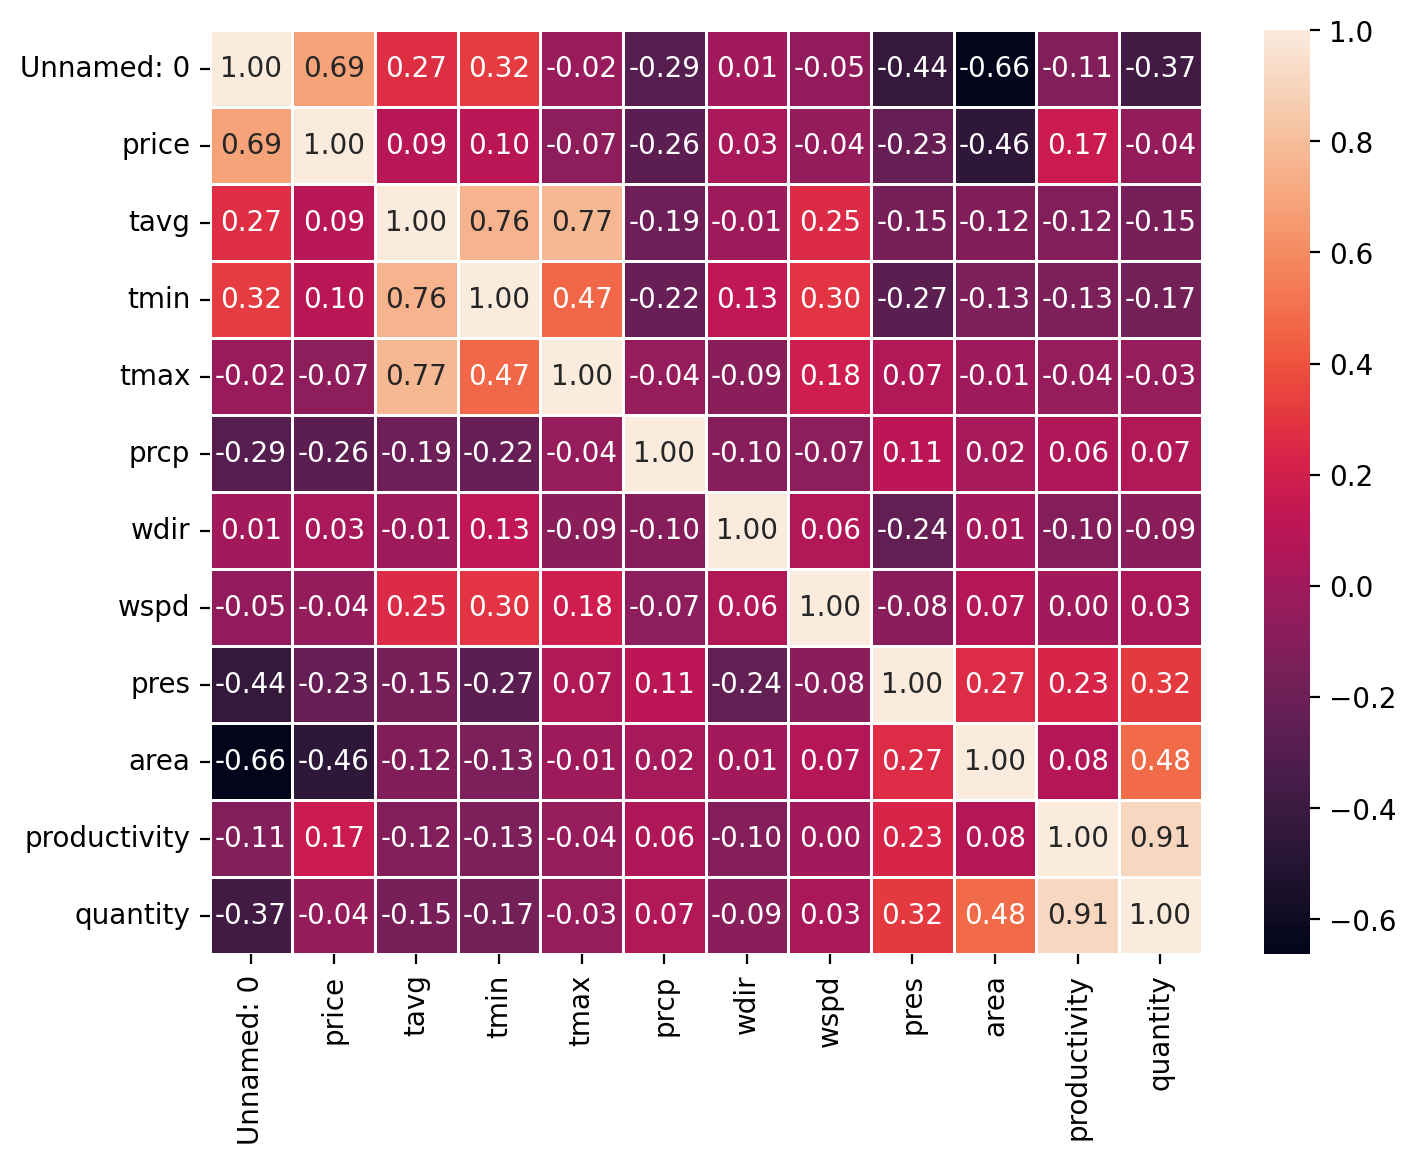

In [29]:
plt.figure(figsize=(8,6), dpi =200)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

In [30]:
df_gasoline = pd.read_excel('https://s3-hcm-r1.longvan.net/machine-learning/GiaXang.xlsx')
df_gasoline.head()

,date,RON 95-III
0,22/08/2018,21.17
1,06/09/2018,21.47
2,21/09/2018,21.77
3,06/10/2018,22.34
4,22/10/2018,22.20


In [31]:
df_gasoline['date'] = pd.to_datetime(df_gasoline['date'])
df_gasoline.set_index('date', inplace=True)


<ipython-input-31-2ca4586e2886>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_gasoline['date'] = pd.to_datetime(df_gasoline['date'])


In [32]:
idx = pd.date_range(df_gasoline.index.min(), df_gasoline.index.max())
df_gasoline = df_gasoline.reindex(idx)

In [33]:
df_gasoline['RON 95-III'].fillna(method='ffill', inplace=True)

In [34]:
df_gasoline.head(10)

,RON 95-III
2018-06-09,21.47
2018-06-10,22.34
2018-06-11,21.06
2018-06-12,18.45
2018-06-13,18.45
2018-06-14,18.45
2018-06-15,18.45
2018-06-16,18.45
2018-06-17,18.45
2018-06-18,18.45


In [35]:
df.set_index('date', inplace=True)

In [36]:
df_rice_galon = pd.merge(left=df, right=df_gasoline,  left_index=True, right_index=True)
df_rice_galon = df_rice_galon.drop(['Unnamed: 0'], axis=1)
df_rice_galon.head()

,price,tavg,tmin,tmax,prcp,wdir,wspd,pres,area,productivity,quantity,RON 95-III
2018-06-11,10500,27.888889,26.0,32.0,0.268,248.0,8.3,1009.4,235.0,73.5,1727.4,21.06
2018-06-12,10500,28.222222,26.0,33.0,0.268,253.0,6.8,1008.5,235.0,73.5,1727.4,18.45
2018-06-13,10500,27.277778,25.0,32.0,0.268,253.0,6.6,1008.5,235.0,73.5,1727.4,18.45
2018-06-14,10500,28.277778,25.0,33.0,0.268,253.0,7.4,1007.0,235.0,73.5,1727.4,18.45
2018-06-15,10500,28.388889,24.0,33.0,0.268,253.0,9.6,1006.8,235.0,73.5,1727.4,18.45


In [37]:
df_rice_galon.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 885 entries, 2018-06-11 to 2022-12-27
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         885 non-null    int64  
 1   tavg          885 non-null    float64
 2   tmin          885 non-null    float64
 3   tmax          885 non-null    float64
 4   prcp          885 non-null    float64
 5   wdir          885 non-null    float64
 6   wspd          885 non-null    float64
 7   pres          885 non-null    float64
 8   area          885 non-null    float64
 9   productivity  885 non-null    float64
 10  quantity      885 non-null    float64
 11  RON 95-III    885 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 89.9 KB


In [38]:
corr = df_rice_galon.corr(method = 'pearson')
corr

,price,tavg,tmin,tmax,prcp,wdir,wspd,pres,area,productivity,quantity,RON 95-III
price,1.000000,-0.055753,-0.016665,-0.106608,0.085769,0.021423,-0.235996,-0.093733,-0.721211,0.481475,0.273016,0.359687
tavg,-0.055753,1.000000,0.705474,0.825689,-0.072414,-0.114781,0.205930,-0.055626,-0.017861,-0.147463,-0.156810,-0.113748
tmin,-0.016665,0.705474,1.000000,0.468295,0.053216,0.063671,0.319228,-0.303271,0.005202,-0.101386,-0.102608,-0.072283
tmax,-0.106608,0.825689,0.468295,1.000000,-0.083695,-0.200092,0.089900,0.132585,-0.034644,-0.148733,-0.163133,-0.117096
prcp,0.085769,-0.072414,0.053216,-0.083695,1.000000,0.070783,0.022830,-0.090662,-0.047370,-0.000565,-0.015962,0.168693
wdir,0.021423,-0.114781,0.063671,-0.200092,0.070783,1.000000,0.151251,-0.465208,0.054259,0.001286,0.017958,-0.008794
wspd,-0.235996,0.205930,0.319228,0.089900,0.022830,0.151251,1.000000,-0.254807,0.268659,-0.079349,0.000396,-0.048979
pres,-0.093733,-0.055626,-0.303271,0.132585,-0.090662,-0.465208,-0.254807,1.000000,-0.030061,-0.002762,-0.012382,-0.009067
area,-0.721211,-0.017861,0.005202,-0.034644,-0.047370,0.054259,0.268659,-0.030061,1.000000,-0.238051,0.058546,0.075997
productivity,0.481475,-0.147463,-0.101386,-0.148733,-0.000565,0.001286,-0.079349,-0.002762,-0.238051,1.000000,0.955599,0.226537


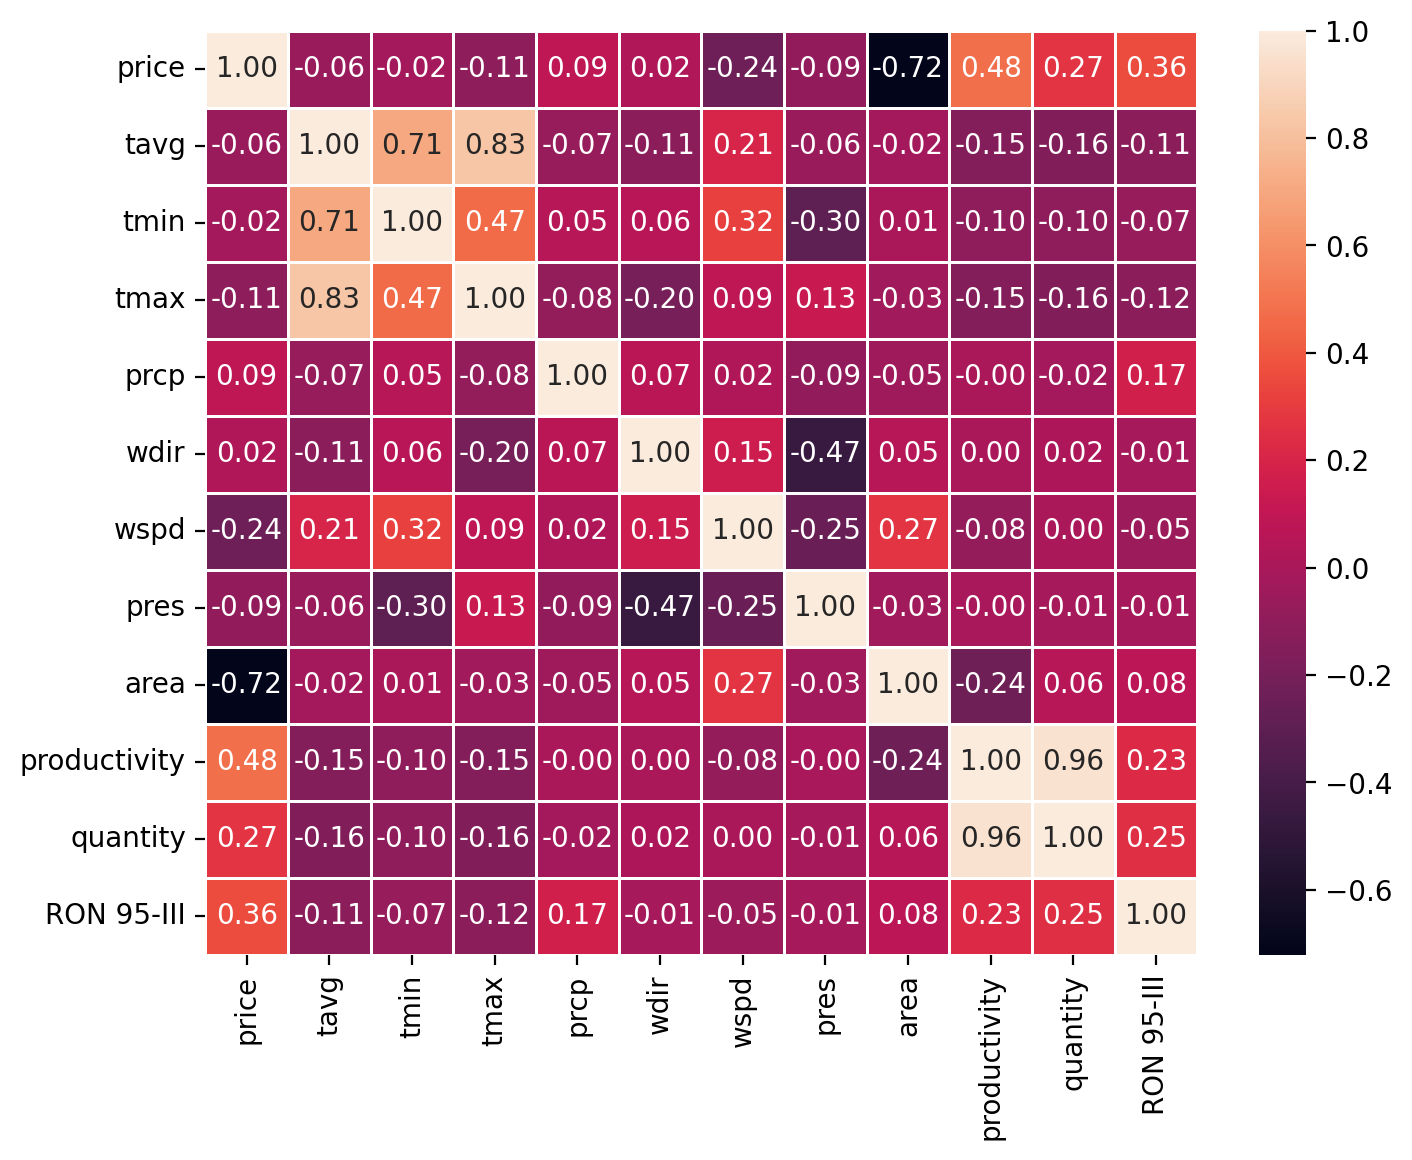

In [39]:
plt.figure(figsize=(8,6), dpi =200)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

In [40]:
df_rice_galon.head()

,price,tavg,tmin,tmax,prcp,wdir,wspd,pres,area,productivity,quantity,RON 95-III
2018-06-11,10500,27.888889,26.0,32.0,0.268,248.0,8.3,1009.4,235.0,73.5,1727.4,21.06
2018-06-12,10500,28.222222,26.0,33.0,0.268,253.0,6.8,1008.5,235.0,73.5,1727.4,18.45
2018-06-13,10500,27.277778,25.0,32.0,0.268,253.0,6.6,1008.5,235.0,73.5,1727.4,18.45
2018-06-14,10500,28.277778,25.0,33.0,0.268,253.0,7.4,1007.0,235.0,73.5,1727.4,18.45
2018-06-15,10500,28.388889,24.0,33.0,0.268,253.0,9.6,1006.8,235.0,73.5,1727.4,18.45


In [41]:
df.to_csv("./data-rice.csv")

In [42]:
from google.colab import files
files.download("data-rice.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

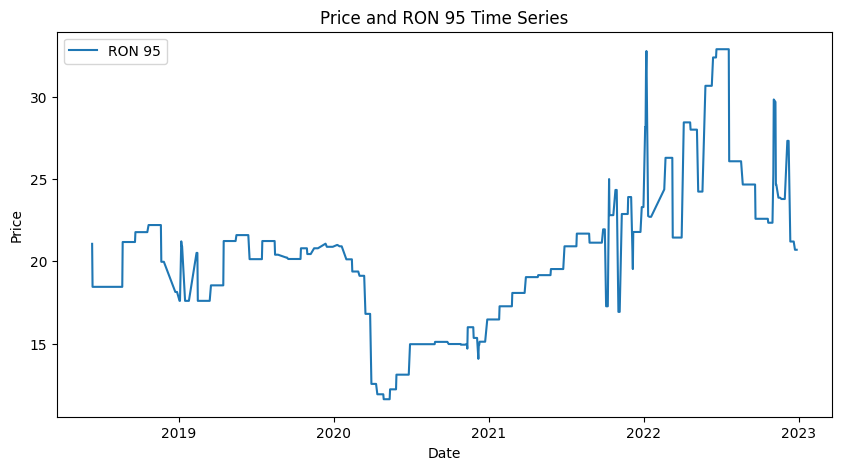

In [43]:
plt.figure(figsize=(10, 5))
# plt.plot(df.index, df['price'], label='Price')
plt.plot(df_rice_galon.index, df_rice_galon['RON 95-III'], label='RON 95')

plt.title('Price and RON 95 Time Series')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Xuất khẩu lúa gạo

In [44]:
df_xuat_khau = pd.read_excel("https://s3-hcm-r1.longvan.net/machine-learning/xuat_khau_lua.xlsx")
df_xuat_khau.head()

,Loại,Năm,Tháng,Ngày,Thái Lan,Ấn Độ,Việt Nam,Pakistan
0,25% tấm,2023,12,14,600.0,NaN,645.0,515
1,25% tấm,2023,12,7,600.0,NaN,645.0,530
2,25% tấm,2023,11,30,608.0,NaN,645.0,505
3,25% tấm,2023,11,23,577.0,NaN,650.0,498
4,25% tấm,2023,11,16,560.0,NaN,645.0,488


In [45]:
df_xuat_khau["Loại"].value_counts()

5% tấm     410
25% tấm    301
Name: Loại, dtype: int64

In [46]:
df_xuat_khau[df_xuat_khau["Loại"] == '5% tấm']['Năm'].unique()

array([2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016])

In [47]:
df_xuat_khau = df_xuat_khau[df_xuat_khau["Loại"] == '5% tấm']

In [48]:
df_xuat_khau.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 50 to 710
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Loại      410 non-null    object 
 1   Năm       410 non-null    int64  
 2   Tháng     410 non-null    int64  
 3   Ngày      410 non-null    int64  
 4   Thái Lan  409 non-null    float64
 5   Ấn Độ     385 non-null    float64
 6   Việt Nam  407 non-null    float64
 7   Pakistan  409 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 28.8+ KB


In [49]:
df_xuat_khau['date'] = pd.to_datetime(df_xuat_khau['Năm'].astype(str) + "/" + df_xuat_khau['Tháng'].astype(str) + "/"
+  df_xuat_khau['Ngày'].astype(str), format='%Y/%m/%d')

In [50]:
df_xuat_khau = df_xuat_khau.drop(['Ấn Độ', 'Pakistan', 'Năm', 'Tháng', 'Ngày', 'Loại'], axis=1)

In [51]:
df_xuat_khau.head()

,Thái Lan,Việt Nam,date
50,634.0,660.0,2023-12-14
51,631.0,665.0,2023-12-07
52,640.0,660.0,2023-11-30
53,602.0,665.0,2023-11-23
54,583.0,655.0,2023-11-16


In [52]:
df_xuat_khau.set_index('date', inplace=True)
df_xuat_khau.head()

,Thái Lan,Việt Nam
date,,
2023-12-14,634.0,660.0
2023-12-07,631.0,665.0
2023-11-30,640.0,660.0
2023-11-23,602.0,665.0
2023-11-16,583.0,655.0


In [53]:
idx = pd.date_range(df_xuat_khau.index.min(), df_xuat_khau.index.max())
df_xuat_khau = df_xuat_khau.reindex(idx)

In [54]:
df_xuat_khau.fillna(method='ffill', inplace=True)
df_xuat_khau.head()

,Thái Lan,Việt Nam
2016-01-08,365.0,360.0
2016-01-09,365.0,360.0
2016-01-10,365.0,360.0
2016-01-11,365.0,360.0
2016-01-12,365.0,360.0


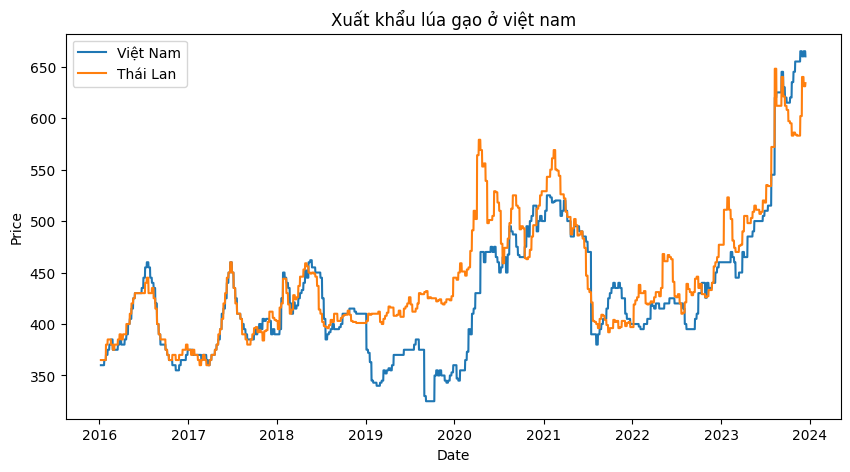

In [55]:
plt.figure(figsize=(10, 5))
# plt.plot(df.index, df['price'], label='Price')
plt.plot(df_xuat_khau.index, df_xuat_khau['Việt Nam'], label='Việt Nam')
plt.plot(df_xuat_khau.index, df_xuat_khau['Thái Lan'], label='Thái Lan')

plt.title('Xuất khẩu lúa gạo ở việt nam')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [56]:
df.head()

,Unnamed: 0,price,tavg,tmin,tmax,prcp,wdir,wspd,pres,area,productivity,quantity
date,,,,,,,,,,,,
2010-01-05,487,8250,26.888889,23.277778,33.222222,0.909,117.0,7.2,1011.0,234.2,73.0,1708.9
2010-01-07,488,8250,26.722222,21.611111,34.000000,0.909,42.0,5.4,1011.0,234.2,73.0,1708.9
2010-01-11,489,8250,26.388889,23.000000,31.611111,0.909,42.0,5.4,1011.0,234.2,73.0,1708.9
2010-01-12,490,8250,25.777778,23.000000,32.000000,0.909,42.0,6.2,1011.0,234.2,73.0,1708.9
2010-01-13,491,8250,25.777778,21.000000,32.388889,0.909,42.0,4.5,1011.0,234.2,73.0,1708.9


In [57]:
df_xuat_khau.head()

,Thái Lan,Việt Nam
2016-01-08,365.0,360.0
2016-01-09,365.0,360.0
2016-01-10,365.0,360.0
2016-01-11,365.0,360.0
2016-01-12,365.0,360.0


In [58]:
df_rice_xk =  pd.merge(left=df, right=df_xuat_khau,  left_index=True, right_index=True)
df_rice_xk.head()


,Unnamed: 0,price,tavg,tmin,tmax,prcp,wdir,wspd,pres,area,productivity,quantity,Thái Lan,Việt Nam
2016-02-15,1571,9500,29.222222,25.0,35.0,0.268,127.0,8.3,1013.6,239.3,71.9,1719.9,385.0,380.0
2016-02-17,1572,9500,28.222222,24.0,34.0,0.268,144.0,5.4,1013.8,239.3,71.9,1719.9,385.0,380.0
2016-02-18,1573,9500,28.277778,22.0,34.0,0.268,144.0,6.0,1012.8,239.3,71.9,1719.9,385.0,380.0
2016-02-22,1574,10000,28.222222,24.0,35.0,0.268,144.0,7.0,1014.3,239.3,71.9,1719.9,380.0,385.0
2016-02-23,1575,10000,28.111111,24.0,34.0,0.268,144.0,8.6,1013.4,239.3,71.9,1719.9,380.0,385.0


In [59]:
df_rice_xk = df_rice_xk.drop('Unnamed: 0', axis=1)

In [60]:
corr = df_rice_xk.corr(method = 'pearson')
corr

,price,tavg,tmin,tmax,prcp,wdir,wspd,pres,area,productivity,quantity,Thái Lan,Việt Nam
price,1.000000,-0.011627,-0.006739,-0.056213,0.083814,-0.086127,-0.096168,0.001321,-0.843695,0.599171,0.239749,0.469465,0.486887
tavg,-0.011627,1.000000,0.705582,0.828630,-0.061822,-0.137896,0.226271,-0.023759,-0.017550,-0.076352,-0.092744,0.151268,0.013048
tmin,-0.006739,0.705582,1.000000,0.484784,0.046027,0.016149,0.318446,-0.206323,0.013715,-0.056515,-0.055275,0.096148,0.037236
tmax,-0.056213,0.828630,0.484784,1.000000,-0.072434,-0.202881,0.129590,0.112356,-0.004832,-0.076820,-0.086717,0.138513,-0.024023
prcp,0.083814,-0.061822,0.046027,-0.072434,1.000000,0.055915,0.022010,-0.058536,-0.054092,0.013979,-0.012711,-0.017323,-0.025183
wdir,-0.086127,-0.137896,0.016149,-0.202881,0.055915,1.000000,0.050724,-0.352129,0.134078,-0.103180,-0.048337,-0.071157,0.025832
wspd,-0.096168,0.226271,0.318446,0.129590,0.022010,0.050724,1.000000,-0.150916,0.084133,-0.021156,0.020848,-0.022524,-0.115759
pres,0.001321,-0.023759,-0.206323,0.112356,-0.058536,-0.352129,-0.150916,1.000000,-0.031813,0.034465,0.022319,-0.003249,-0.123353
area,-0.843695,-0.017550,0.013715,-0.004832,-0.054092,0.134078,0.084133,-0.031813,1.000000,-0.437465,0.016221,-0.654362,-0.525954
productivity,0.599171,-0.076352,-0.056515,-0.076820,0.013979,-0.103180,-0.021156,0.034465,-0.437465,1.000000,0.891946,0.209169,0.467889


In [77]:
from google.colab import files
df_rice_xk.to_csv("./df_rice_xk.csv")
files.download("./df_rice_xk.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [76]:
df_rice_xk.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1214 entries, 2016-02-15 to 2022-12-27
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         1214 non-null   int64  
 1   tavg          1214 non-null   float64
 2   tmin          1214 non-null   float64
 3   tmax          1214 non-null   float64
 4   prcp          1214 non-null   float64
 5   wdir          1214 non-null   float64
 6   wspd          1214 non-null   float64
 7   pres          1214 non-null   float64
 8   area          1214 non-null   float64
 9   productivity  1214 non-null   float64
 10  quantity      1214 non-null   float64
 11  Thái Lan      1214 non-null   float64
 12  Việt Nam      1214 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 132.8 KB


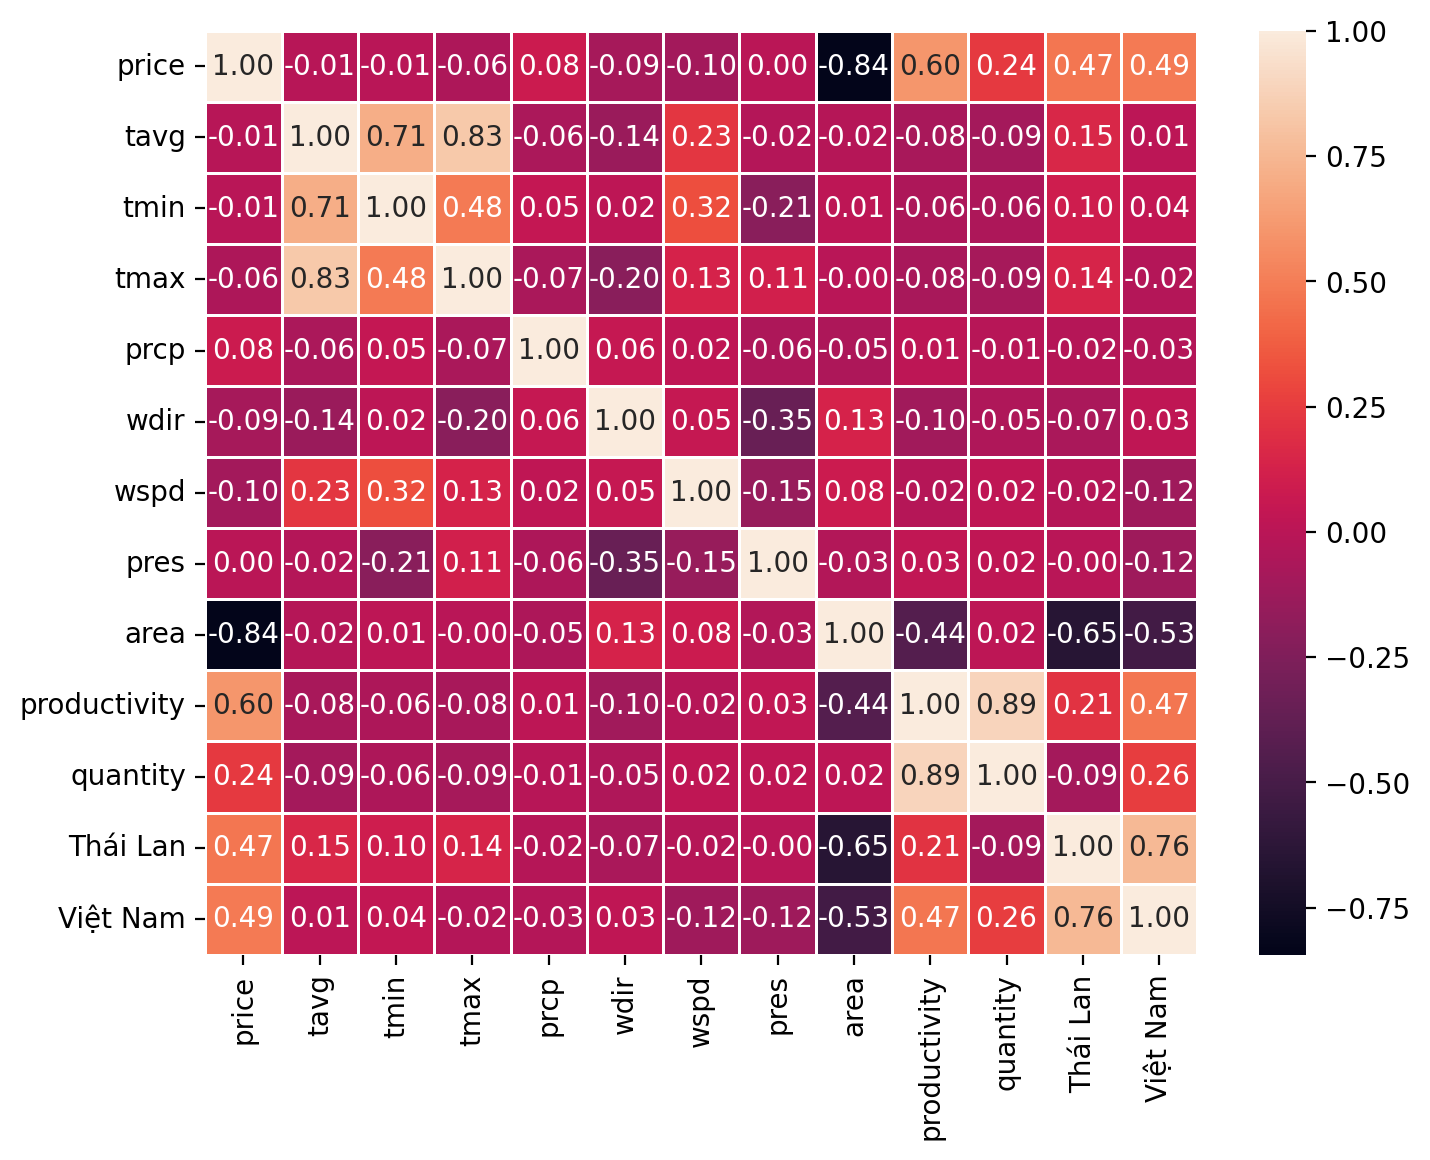

In [61]:
plt.figure(figsize=(8,6), dpi =200)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

## Khối lượng xuất khẩu

In [62]:
df_kl_xuat_khau = pd.read_excel("https://s3-hcm-r1.longvan.net/machine-learning/klxuakhau.xlsx")
df_kl_xuat_khau.head()

,Năm,Tháng,Khối lượng (tấn),Giá trị (USD)
0,2023,11,600481,400345332
1,2023,10,635102,406762427
2,2023,9,605410,377783375
3,2023,8,921443,546405796
4,2023,7,660738,362660136


In [63]:
df_kl_xuat_khau['date'] = pd.to_datetime(df_kl_xuat_khau['Năm'].astype(str) + "/" + df_kl_xuat_khau['Tháng'].astype(str), format='%Y/%m/%d')

In [64]:
df_kl_xuat_khau.set_index('date', inplace=True)
df_kl_xuat_khau.head()

,Năm,Tháng,Khối lượng (tấn),Giá trị (USD)
date,,,,
2023-11-01,2023,11,600481,400345332
2023-10-01,2023,10,635102,406762427
2023-09-01,2023,9,605410,377783375
2023-08-01,2023,8,921443,546405796
2023-07-01,2023,7,660738,362660136


In [65]:
idx = pd.date_range(df_kl_xuat_khau.index.min(), df_kl_xuat_khau.index.max())
df_kl_xuat_khau = df_kl_xuat_khau.reindex(idx)

In [66]:
df_kl_xuat_khau.fillna(method='ffill', inplace=True)
df_kl_xuat_khau.head()

,Năm,Tháng,Khối lượng (tấn),Giá trị (USD)
2010-01-01,2010.0,1.0,379979.0,204550382.0
2010-01-02,2010.0,1.0,379979.0,204550382.0
2010-01-03,2010.0,1.0,379979.0,204550382.0
2010-01-04,2010.0,1.0,379979.0,204550382.0
2010-01-05,2010.0,1.0,379979.0,204550382.0


In [67]:
df_kl_xuat_khau = df_kl_xuat_khau.drop([ 'Năm', 'Tháng'], axis=1)

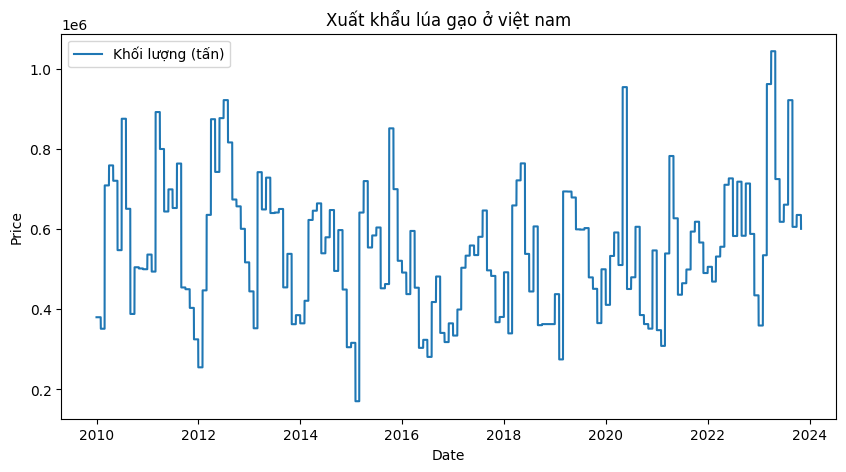

In [68]:
plt.figure(figsize=(10, 5))
# plt.plot(df.index, df['price'], label='Price')
plt.plot(df_kl_xuat_khau.index, df_kl_xuat_khau['Khối lượng (tấn)'], label='Khối lượng (tấn)')
# plt.plot(df_kl_xuat_khau.index, df_kl_xuat_khau['Thái Lan'], label='Thái Lan')

plt.title('Xuất khẩu lúa gạo ở việt nam')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [69]:
df_rice_kl_xk =  pd.merge(left=df, right=df_kl_xuat_khau,  left_index=True, right_index=True)
df_rice_kl_xk.head()

,Unnamed: 0,price,tavg,tmin,tmax,prcp,wdir,wspd,pres,area,productivity,quantity,Khối lượng (tấn),Giá trị (USD)
2010-01-05,487,8250,26.888889,23.277778,33.222222,0.909,117.0,7.2,1011.0,234.2,73.0,1708.9,379979.0,204550382.0
2010-01-07,488,8250,26.722222,21.611111,34.000000,0.909,42.0,5.4,1011.0,234.2,73.0,1708.9,379979.0,204550382.0
2010-01-11,489,8250,26.388889,23.000000,31.611111,0.909,42.0,5.4,1011.0,234.2,73.0,1708.9,379979.0,204550382.0
2010-01-12,490,8250,25.777778,23.000000,32.000000,0.909,42.0,6.2,1011.0,234.2,73.0,1708.9,379979.0,204550382.0
2010-01-13,491,8250,25.777778,21.000000,32.388889,0.909,42.0,4.5,1011.0,234.2,73.0,1708.9,379979.0,204550382.0


In [70]:
df_rice_kl_xk = df_rice_kl_xk.drop("Unnamed: 0", axis=1)

In [71]:
df_rice_kl_xk = df_rice_kl_xk.rename(columns={'Khối lượng (tấn)': 'volume', 'Giá trị (USD)': 'value'})

In [72]:
df_rice_kl_xl_corr = df_rice_kl_xk[['price', 'volume', 'value']]
corr = df_rice_kl_xl_corr.corr(method = 'pearson')
corr

,price,volume,value
price,1.000000,-0.054533,0.068750
volume,-0.054533,1.000000,0.946452
value,0.068750,0.946452,1.000000


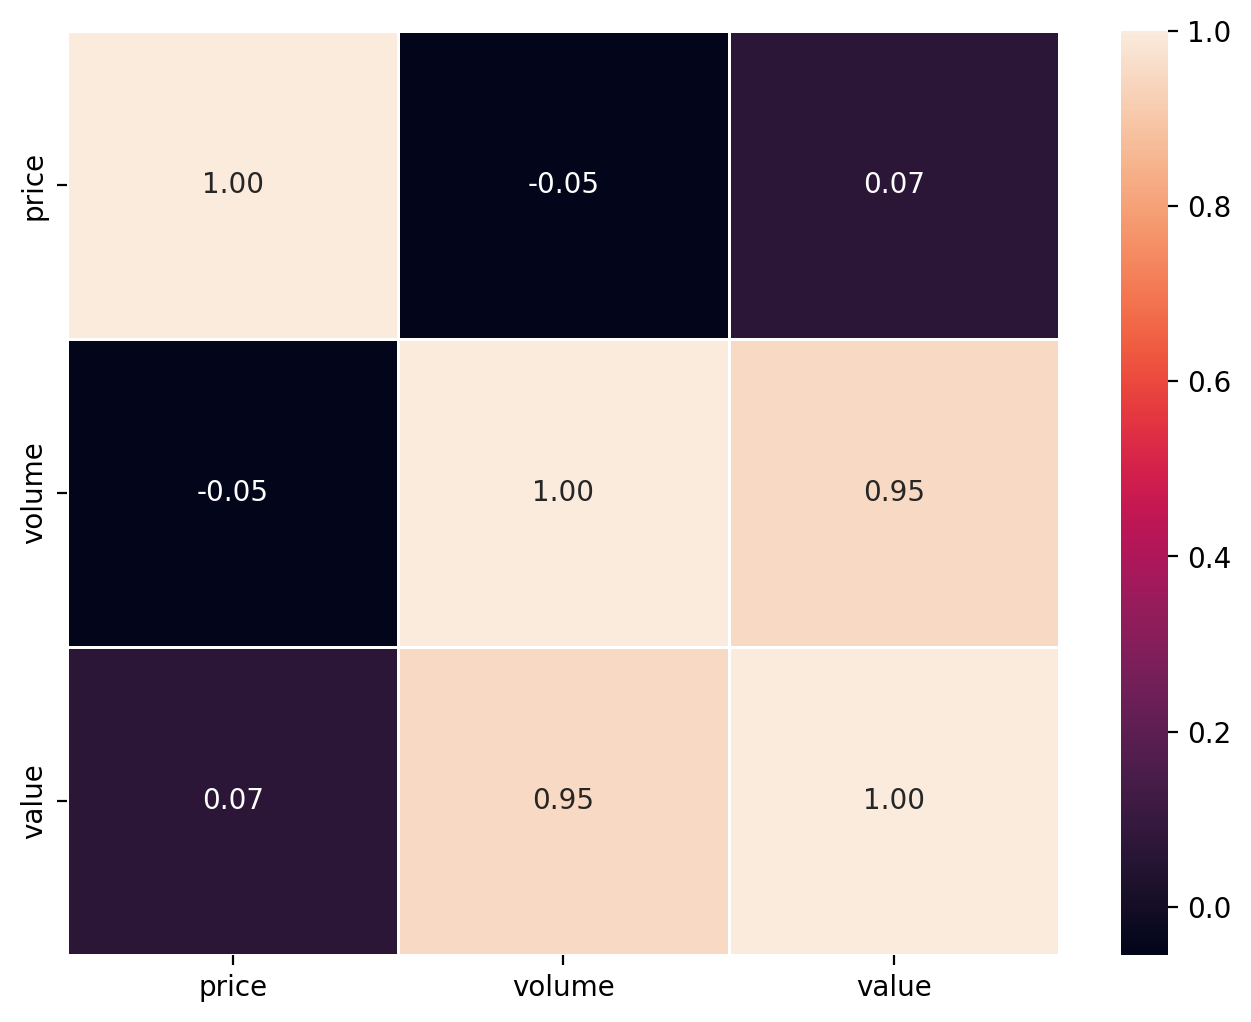

In [73]:
plt.figure(figsize=(8,6), dpi =200)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

In [74]:
def crosscorr(datax, datay, lag=0):
    if(lag >= 0):
      return datax.shift(lag).corr(datay.fillna(method='ffill'))
    else:
      return datax.corr(datay.shift(lag).fillna(method='ffill'))


def cal_max_correlation_lag(df):
  price = df['price']

  for col in df.columns:
    if(col == 'date'):
      continue
    tavg = df[col]
    max_corr = float('-inf')  # Initialize with negative infinity
    max_lag = None

    for i in range(1000):
      corr = crosscorr(price, tavg, lag=i)  # Get correlation at lag i

      if corr > max_corr:
        max_corr = corr
        max_lag = i

    # Example usage (assuming you have your DataFrame 'df'):
    print(f"Maximum correlation lag {col}: {max_lag}: {max_corr}")

In [75]:
cal_max_correlation_lag(df_rice_kl_xk)

Maximum correlation lag price: 0: 0.9999999999999998
Maximum correlation lag tavg: 672: 0.2565417101809598
Maximum correlation lag tmin: 670: 0.2790395539903495
Maximum correlation lag tmax: 674: 0.13383370632527755
Maximum correlation lag prcp: 560: 0.37606698522104987
Maximum correlation lag wdir: 520: 0.19117226646863925
Maximum correlation lag wspd: 999: 0.07477677657779784
Maximum correlation lag pres: 999: -0.1081732896830717
Maximum correlation lag area: 724: -0.17206901165539018
Maximum correlation lag productivity: 542: 0.20892957370954124
Maximum correlation lag quantity: 542: 0.10018298364929291
Maximum correlation lag volume: 290: 0.10683708991912144
Maximum correlation lag value: 999: 0.22298936298218022
